# Support Vector Machine

## Importing required libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from numpy.matlib import repmat
import seaborn as sns
from sklearn.linear_model import RidgeClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from numpy.linalg import multi_dot
from sklearn.metrics.pairwise import rbf_kernel

# To execute a cell line by line
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


a) Which classifier would be able to achieve better performance on this distribution? Justify your choice

A support vector machine with radial bias kernel will achieve better performance for the given distribution as the data is not linearly seperable. The data can be projected into a higher dimension where it will be linearly seperable.

b) Implement your chosen classifier and report your accuracy.


### Import data

In [12]:
txt_df = pd.read_csv('hw3_data2.txt', names=['class', 'x', 'y'])
print("The number of rows in data : {}".format(txt_df.shape[0]))
print("The number of columns in data : {}".format(txt_df.shape[1]))
print("The first few rows of the data:")
txt_df.head()

The number of rows in data : 3600
The number of columns in data : 3
The first few rows of the data:


,class,x,y
0,+,1.607874,9.247557
1,+,3.003258,6.610258
2,+,4.069008,18.327280
3,+,0.407198,14.835517
4,+,13.747305,8.219991


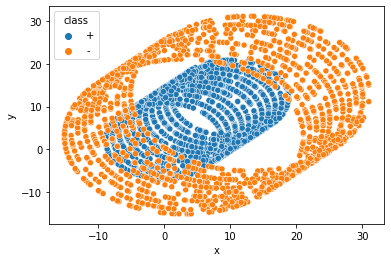

In [13]:
# Plotting the data
sns.scatterplot('x','y', data=txt_df, hue='class')
plt.show()

In [14]:
# Converting '+' class into 1 and '-' class into 0
txt_df['class'] = np.where(txt_df['class'] == '+',1,0)
txt_df.head(2)

,class,x,y
0,1,1.607874,9.247557
1,1,3.003258,6.610258


In [15]:
# Creating features and target datasets
X = txt_df[['x','y']]
y = txt_df[['class']]

### SVM implemetation from scratch

In [16]:
# Function to calculate cost
def costCalc(w, X, Y):
  N = X.shape[0]
  dist = 1 - Y * (np.dot(X, w))
  dist[dist < 0] = 0
  loss = strength * (np.sum(dist) / N)
  cost = 1 / 2 * np.dot(w, w) + loss
  return cost

In [17]:
# Function to calculate gradient
def gradientCalc(w, X1, Y1):
  if type(Y1) == np.float64:
      Y1 = np.array([Y1])
      X1 = np.array([X1])
  distance = 1 - (Y1 * np.dot(X1, w))
  dw = np.zeros(len(w))
  for ind, d in enumerate(distance):
      if max(0, d) == 0:
          di = w
      else:
          di = w - (strength * Y1[ind] * X1[ind])
      dw += di
  dw = dw/len(Y1)  # average
  return dw

In [18]:
# Fubction to minimize the cost function using Stochastic Gradient Descent
def stocGradDes(features, target):
  epochs = 5000
  w = np.zeros(features.shape[1])
  n = 0
  prev_cost = float("inf")
  cost_threshold = 0.01 
  for j in range(1, epochs):
    X, Y = shuffle(features, target)
    for i, x in enumerate(X):
        ascent = gradientCalc(w, x, Y[i])
        w = w - (learning_rate * ascent)
    if j == 2 ** n or j == epochs - 1:
        cost = costCalc(w, features, target)
        if abs(prev_cost - cost) < cost_threshold * prev_cost:
            return w
        prev_cost = cost
        n += 1
  return w

In [19]:
# split data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
strength = 10000
learning_rate = 0.000001

# Model training
W = stocGradDes(X_train.to_numpy(), y_train.to_numpy())

In [21]:
# Model testing
y_pred = np.array([])
for i in range(X_train.shape[0]):
  yp = np.sign(np.dot(X_train.to_numpy()[i], W))
  y_pred = np.append(y_pred, yp)

# Train accuracy
print("accuracy on test dataset: {}%".format(round(accuracy_score(y_train, y_pred)*100,2)))

accuracy on test dataset: 46.84%


In [22]:
# Model prediction and accuracy
y_pred = np.array([])
for i in range(X_test.shape[0]):
  yp = np.sign(np.dot(X_test.to_numpy()[i], W))
  y_pred = np.append(y_pred, yp)

# Test accuracy
print("accuracy on test dataset: {}%".format(round(accuracy_score(y_test, y_pred)*100),2))

accuracy on test dataset: 50%


### SVM implemetation with RBF kernel using sklearn

Implemeting SVM with RBF kernel using sklearn for better accuracy

In [23]:
X = txt_df[['x','y']]
y = txt_df[['class']]

In [24]:
# Model training
svm = SVC(kernel = 'rbf', gamma=0.01)
svm.fit(X, y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [25]:
# Model prediction
y_pred = svm.predict(X)
y_pred
df_pred1 = pd.DataFrame(y_pred, columns = ['predicted_class'])
df_pred =  pd.concat([X, df_pred1], axis=1)

array([1, 1, 1, ..., 0, 0, 0])

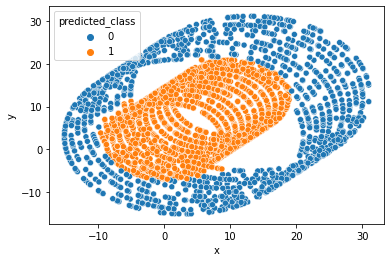

In [26]:
# Plotting the trained classifier data
sns.scatterplot(data=df_pred, x="x", y="y", hue="predicted_class")

In [27]:
# Model score
score = svm.score(X, y)
print("Model score is : ", round(score,2))

Model score is :  0.95


c) Produce a plot that shows your final classifier as a dotted line, along with the original data points.
You can make the plot either in the original space or feature space.

In [28]:
h = .05
x_min, x_max = -30, 40
y_min, y_max = -30, 40
x1, y1 = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))

In [29]:
z = svm.predict(np.c_[x1.ravel(), y1.ravel()])

<Figure size 720x576 with 0 Axes>

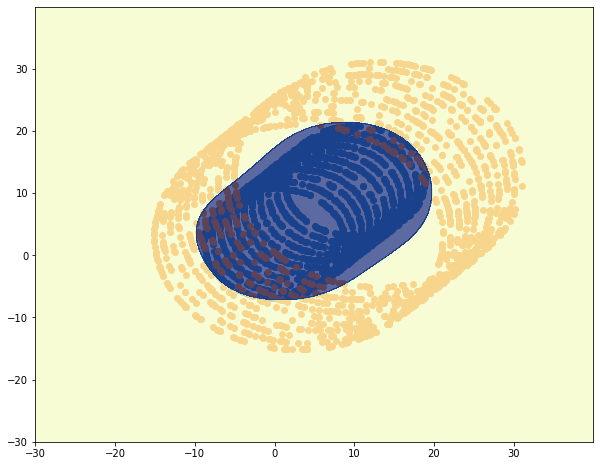

In [30]:
# Plotting the data with classifier
plt.figure(figsize=(10,8))

z = z.reshape(x1.shape)
plt.scatter(txt_df['x'].loc[txt_df['class'] == 1], txt_df['y'].loc[txt_df['class'] == 1])
plt.scatter(txt_df['x'].loc[txt_df['class'] == 0], txt_df['y'].loc[txt_df['class'] == 0])
plt.contourf(x1, y1, z, cmap=plt.cm.YlGnBu, alpha=0.7)
plt.show()